In [1]:
import pandas as pd
import os
import numpy as np
from notebooks.pareto_generator import generate_pareto
from notebooks.pareto_generator import filtra_fronteira_pareto_func

In [2]:
path_solutions = 'solutions/'

solution_df_list = []
resultados_agrupados_dict = dict()
X_var_dict = dict()
N_var_dict = dict()
problem_size_df = None
for idx, sol in enumerate(os.listdir(path_solutions)):
    path_sol = path_solutions + sol + '/'
    
    sol_df = pd.read_csv(path_sol + 'solution.csv')
    sol_df['solution'] = idx
    solution_df_list.append(sol_df)

    X_var = pd.read_csv(path_sol + 'X_var.csv')
    X_var_dict[idx] = X_var

    N_var = pd.read_csv(path_sol + 'N_var.csv')
    N_var_dict[idx] = N_var

    if problem_size_df is None:
        problem_size_df = pd.read_csv(path_sol + 'problem_sets.csv')


solution_df = pd.concat(solution_df_list).reset_index(drop=True)
solution_df.head(3)

,Fobj,Result,solution
0,Obj1,5.944386e+06,0
1,Obj2,4.840733e+01,0
2,Obj1,5.912408e+06,1


In [3]:
df_pivot = (
    solution_df
    .pivot(index='solution', columns='Fobj', values='Result')
    .rename(columns={'Obj1': 'obj1', 'Obj2': 'obj2'})
    .reset_index()
    .sort_values(by='obj1')
    # .drop(columns=['Fobj'])
)
# solutions_drop = pd.Series([24, 28, 13, 7, 6, 3, 16, 11, 2, 18])
df_pivot_new = df_pivot#df_pivot[~df_pivot['solution'].isin(solutions_drop)]

Hipervolume : 3874901.7897373806
HipervolumeNormalized : 0.7953645248546786
Delta_metric: 0.808316345996557 


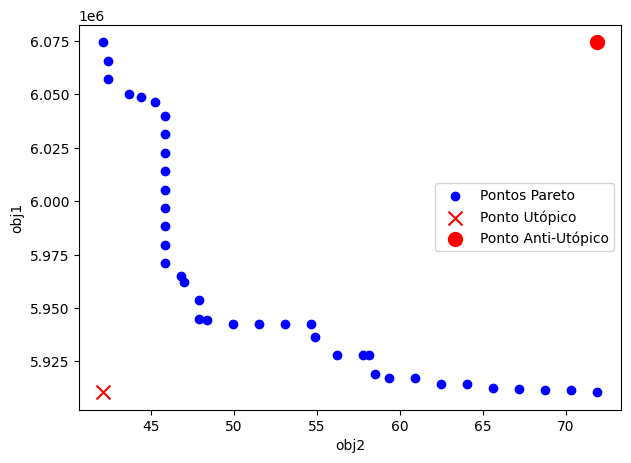

Hipervolume : 3874901.7897373806
HipervolumeNormalized : 0.7953645248546786
Delta_metric: 1.1157209860170458 


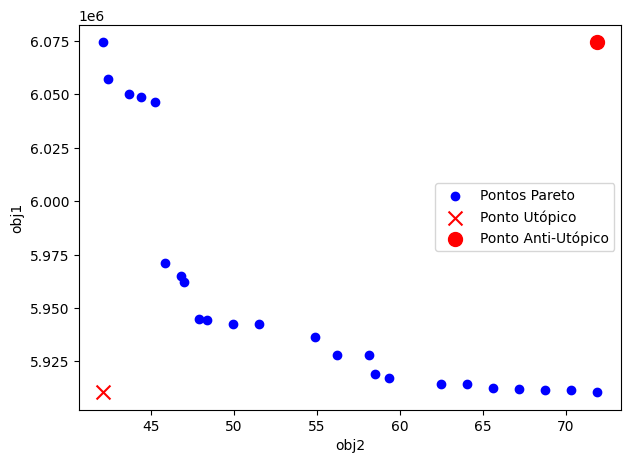

In [4]:
df_pivot = df_pivot_new
generate_pareto(df_pivot_new)
generate_pareto(df_pivot_new, filtra_pareto=True)

In [5]:
# decision_matrix = filtra_fronteira_pareto_func(df_pivot_new)
decision_matrix = df_pivot_new

In [6]:
agg_dict = {'Valor_Var': 'sum'}
decision_matrix['Pacientes por Hospital STDdev'] = (
    decision_matrix
    .apply(
        lambda x: X_var_dict[x['solution']]
        .groupby('Hospital')
        .agg(agg_dict)
        ['Valor_Var']
        .std()
    ,axis=1)
)

decision_matrix['Maximo Paciente em um dia no hospital'] = (
    decision_matrix
    .apply(
        lambda x: N_var_dict[x['solution']]
        .groupby(['Hospital', 'Dia'])
        .agg({'Valor_Var': 'sum'})
        .reset_index()
        .groupby('Hospital')
        .agg({'Valor_Var': 'max'})
        ['Valor_Var']
        .max()
        ,axis=1
    )
)
orig_decision_matrix = decision_matrix.copy()
orig_decision_matrix

Fobj,solution,obj1,obj2,Pacientes por Hospital STDdev,Maximo Paciente em um dia no hospital
25,25,5.910552e+06,71.870000,13360.347308,11624.958333
34,34,5.911397e+06,70.306493,13352.651774,11639.000000
37,37,5.911397e+06,68.742266,13352.651774,11639.000000
7,7,5.912051e+06,67.178040,13343.660063,11639.000000
1,1,5.912408e+06,65.613814,13356.403552,11639.000000
31,31,5.914578e+06,64.049588,13336.943049,11633.000000
15,15,5.914578e+06,62.485362,13336.943049,11633.000000
23,23,5.917105e+06,59.356909,13251.302002,11602.000000
10,10,5.917105e+06,60.921136,13251.302002,11602.000000
27,27,5.919183e+06,58.520000,13220.885654,11711.058844


In [7]:
# Função para normalizar uma coluna
def normalizar_coluna(coluna):
    return (coluna - coluna.min()) / (coluna.max() - coluna.min())

cols_normalize = ['obj1','obj2','Pacientes por Hospital STDdev','Maximo Paciente em um dia no hospital']
decision_matrix_norm = decision_matrix.copy()
for col in cols_normalize:
    decision_matrix_norm[col] = normalizar_coluna(decision_matrix_norm[col])

In [8]:
decision_matrix_norm

Fobj,solution,obj1,obj2,Pacientes por Hospital STDdev,Maximo Paciente em um dia no hospital
25,25,0.000000,1.000000,0.894063,0.770653
34,34,0.005155,0.947391,0.880713,0.808056
37,37,0.005155,0.894758,0.880713,0.808056
7,7,0.009145,0.842126,0.865114,0.808056
1,1,0.011321,0.789493,0.887221,0.808056
31,31,0.024562,0.736860,0.853461,0.792074
15,15,0.024562,0.684227,0.853461,0.792074
23,23,0.039975,0.578961,0.704890,0.709499
10,10,0.039975,0.631594,0.704890,0.709499
27,27,0.052651,0.550801,0.652123,1.000000


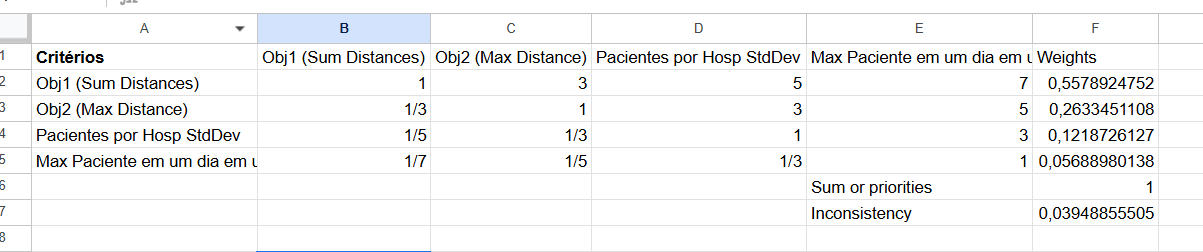

In [9]:
# Weights got from excel 
w_obj1 = 0.5578924752
w_obj2 = 0.2633451108
w_pacientes_por_hosp_stddev = 0.1218726127
w_max_pacientes_day = 0.05688980138

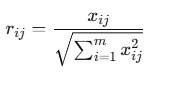

In [10]:
decision_matrix = decision_matrix_norm

In [ ]:
# Normalize matrix
obj1_factor = np.sqrt(np.sum([np.power(elem, 2) for elem in decision_matrix['obj1']]))
obj2_factor = np.sqrt(np.sum([np.power(elem, 2) for elem in decision_matrix['obj2']]))
pacientes_hosp_sttdev_factor = np.sqrt(np.sum([np.power(elem, 2) for elem in decision_matrix['Pacientes por Hospital STDdev']]))
max_paciente_factor = np.sqrt(np.sum([np.power(elem, 2) for elem in decision_matrix['Maximo Paciente em um dia no hospital']]))

normalized_matrix = decision_matrix.copy()
normalized_matrix['obj1'] = normalized_matrix['obj1'] / obj1_factor
normalized_matrix['obj2'] = normalized_matrix['obj2'] / obj2_factor
normalized_matrix['Pacientes por Hospital STDdev'] = normalized_matrix['Pacientes por Hospital STDdev'] / pacientes_hosp_sttdev_factor
normalized_matrix['Maximo Paciente em um dia no hospital'] = normalized_matrix['Maximo Paciente em um dia no hospital'] / max_paciente_factor
normalized_matrix.head(3)


Fobj,solution,obj1,obj2,Pacientes por Hospital STDdev,Maximo Paciente em um dia no hospital
25,25,0.000000,0.356463,0.225714,0.179792
34,34,0.001759,0.337710,0.222343,0.188518
37,37,0.001759,0.318949,0.222343,0.188518


In [12]:
# Apply weights
weighted_matrix = normalized_matrix.copy()
weighted_matrix['obj1'] = weighted_matrix['obj1'] * w_obj1
weighted_matrix['obj2'] = weighted_matrix['obj2'] * w_obj2
weighted_matrix['Pacientes por Hospital STDdev'] = weighted_matrix['Pacientes por Hospital STDdev'] * w_pacientes_por_hosp_stddev
weighted_matrix['Maximo Paciente em um dia no hospital'] = weighted_matrix['Maximo Paciente em um dia no hospital'] * w_max_pacientes_day
weighted_matrix.head(3)

Fobj,solution,obj1,obj2,Pacientes por Hospital STDdev,Maximo Paciente em um dia no hospital
25,25,0.000000,0.093873,0.027508,0.010228
34,34,0.000981,0.088934,0.027098,0.010725
37,37,0.000981,0.083994,0.027098,0.010725


In [ ]:
# Store best and worst decisions
obj1_best_decision = weighted_matrix['obj1'].min()
obj2_best_decision = weighted_matrix['obj2'].min()
pacientes_hostp_stddev_best_decision = weighted_matrix['Pacientes por Hospital STDdev'].min()
max_paciente_best_decision = weighted_matrix['Maximo Paciente em um dia no hospital'].min()

obj1_worst_decision = weighted_matrix['obj1'].max()
obj2_worst_decision = weighted_matrix['obj2'].max()
pacientes_hostp_stddev_worst_decision = weighted_matrix['Pacientes por Hospital STDdev'].max()
max_paciente_worst_decision = weighted_matrix['Maximo Paciente em um dia no hospital'].max()

# Function to calculate distance of a given solution
def calculate_euclidian_distance_best_decision(obj1, obj2, pacientes_hosp_stddev, max_paciente):
    
    power_obj1 = np.power(obj1 - obj1_best_decision, 2)
    power_obj2 = np.power(obj2 - obj2_best_decision, 2)
    power_hosp_stddev = np.power(pacientes_hosp_stddev - pacientes_hostp_stddev_best_decision, 2)
    power_max_paciente = np.power(max_paciente - max_paciente_best_decision, 2)

    result = np.sqrt( 
        power_obj1 + 
        power_obj2 + 
        power_hosp_stddev + 
        power_max_paciente
    )
    return result

# Function to calculate distance of a given solution
def calculate_euclidian_distance_worst_decision(obj1, obj2, pacientes_hosp_stddev, max_paciente):
    
    power_obj1 = np.power(obj1 - obj1_worst_decision, 2)
    power_obj2 = np.power(obj2 - obj2_worst_decision, 2)
    power_hosp_stddev = np.power(pacientes_hosp_stddev - pacientes_hostp_stddev_worst_decision, 2)
    power_max_paciente = np.power(max_paciente - max_paciente_worst_decision, 2)

    result = np.sqrt( 
        power_obj1 + 
        power_obj2 + 
        power_hosp_stddev + 
        power_max_paciente
    )
    return result


# Calculate distance of each solution to best and worst decisions
weighted_matrix['S+'] = weighted_matrix.apply(
    lambda x: calculate_euclidian_distance_best_decision(
        obj1=x['obj1'], 
        obj2=x['obj2'],
        pacientes_hosp_stddev=x['Pacientes por Hospital STDdev'],
        max_paciente=x['Maximo Paciente em um dia no hospital']
    ), axis=1
)
weighted_matrix['S-'] = weighted_matrix.apply(
    lambda x: calculate_euclidian_distance_worst_decision(
        obj1=x['obj1'], 
        obj2=x['obj2'],
        pacientes_hosp_stddev=x['Pacientes por Hospital STDdev'],
        max_paciente=x['Maximo Paciente em um dia no hospital']
    ), axis=1
)

# Calculate P and define rank of decisions
weighted_matrix['P'] = weighted_matrix['S-'] / (weighted_matrix['S+'] + weighted_matrix['S-'])
weighted_matrix['Rank'] = weighted_matrix['P'].rank(ascending=False)
weighted_matrix

Fobj,solution,obj1,obj2,Pacientes por Hospital STDdev,Maximo Paciente em um dia no hospital,S+,S-,P,Rank
25,25,0.000000,0.093873,0.027508,0.010228,0.098354,0.190372,0.659353,24.0
34,34,0.000981,0.088934,0.027098,0.010725,0.093593,0.189456,0.669341,22.0
37,37,0.000981,0.083994,0.027098,0.010725,0.088911,0.189649,0.680819,21.0
7,7,0.001741,0.079053,0.026618,0.010725,0.084118,0.189224,0.692260,19.0
1,1,0.002155,0.074112,0.027298,0.010725,0.079733,0.189249,0.703574,17.0
31,31,0.004675,0.069171,0.026259,0.010513,0.074877,0.187356,0.714464,16.0
15,15,0.004675,0.064230,0.026259,0.010513,0.070338,0.188071,0.727804,14.0
23,23,0.007608,0.054349,0.021688,0.009417,0.059755,0.187198,0.758030,6.0
10,10,0.007608,0.059290,0.021688,0.009417,0.064282,0.186218,0.743385,11.0
27,27,0.010021,0.051705,0.020064,0.013272,0.057901,0.185474,0.762090,4.0


In [14]:
# Chosen decision
filter_decision = weighted_matrix['Rank'] == 1
best_decision = weighted_matrix[filter_decision].index[0]
solution = decision_matrix[filter_decision]['solution'].iloc[0]


pareto_best_decision = (
    decision_matrix[filter_decision]['obj1'].iloc[0], 
    decision_matrix[filter_decision]['obj2'].iloc[0], 
)
decision_matrix[filter_decision]

pareto_best_decision = (
    decision_matrix[filter_decision]['obj1'].iloc[0], 
    decision_matrix[filter_decision]['obj2'].iloc[0], 
)
decision_matrix[filter_decision]


Fobj,solution,obj1,obj2,Pacientes por Hospital STDdev,Maximo Paciente em um dia no hospital
4,4,0.106855,0.473696,0.642826,0.727812


In [15]:
filter_solution = orig_decision_matrix['solution'] == solution 

pareto_best_decision_orig = (
    orig_decision_matrix[filter_solution]['obj1'].iloc[0], 
    orig_decision_matrix[filter_solution]['obj2'].iloc[0], 
)

Hipervolume : 3874901.7897373806
HipervolumeNormalized : 0.7953645248546786
Delta_metric: 0.808316345996557 


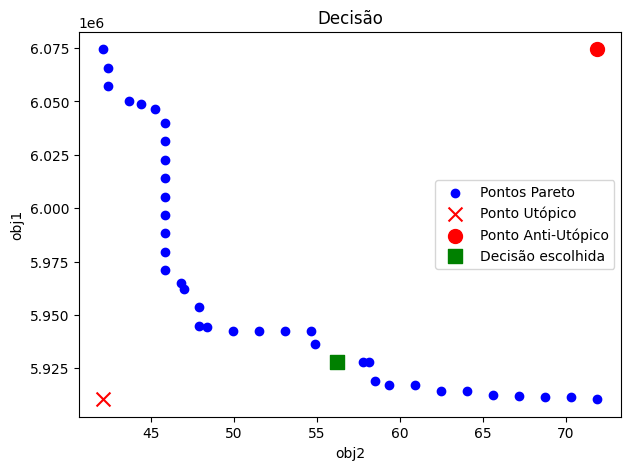

Hipervolume : 3874901.7897373806
HipervolumeNormalized : 0.7953645248546786
Delta_metric: 1.1157209860170458 


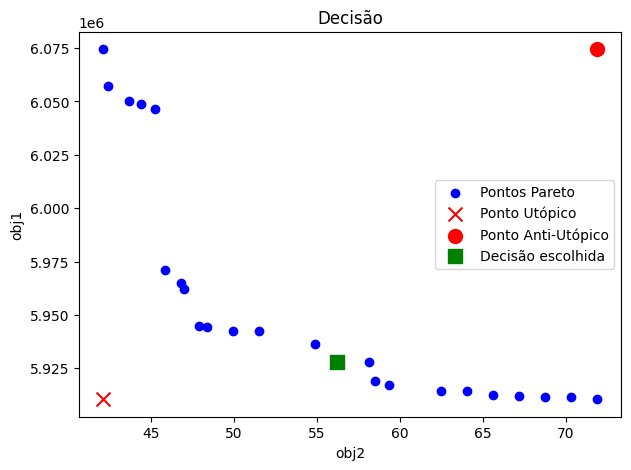

In [16]:
solution

generate_pareto(orig_decision_matrix, title='Decisão', decision=pareto_best_decision_orig)
generate_pareto(orig_decision_matrix, title='Decisão', decision=pareto_best_decision_orig, filtra_pareto=True)

In [17]:
problem_size_df

,Unnamed: 0,H,A,T,R,P
0,0,10,30,13,12,10
